In [1]:
import os
os.chdir(os.pardir)

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import matplotlib.patches as mpatches
import pandas as pd

import vapor
from vapor.models import Cambium

2020-11-13 12:30:00,582 [MainThread  ] [INFO ]  Starting log for vapor...


In [5]:

dfs = []

# --- Define Optimization Variables ---
aggregate_region = 'pca'
opt_vars = ['marginal_cost_mwh']
scenarios = ['StdScen20_HighRECost', 'StdScen20_LowRECost', 'StdScen20_MidCase']
techs = ['pv', 'wind']
batt_sizes = [25., 100.]
batt_durations = [4.]

for opt_var in opt_vars:
    for scenario in scenarios:
        for tech in techs:
            for batt_size in batt_sizes:
                for batt_duration in batt_durations:
                    file = f"{aggregate_region}_best_{tech}_{scenario}_{opt_var}_batt_{batt_size}_{batt_duration}.pkl"
                    fp = os.path.join('results',file)
                    dfs.append(pd.read_pickle(fp))


results = pd.concat(dfs, axis='rows')


In [8]:
set(results.columns)

{'6par_Adj',
 '6par_Il',
 '6par_Io',
 '6par_Rs',
 '6par_Rsh',
 '6par_a',
 'ac_loss',
 'adjusted_installed_cost',
 'analysis_period_irr',
 'annual_ac_battery_loss_percent',
 'annual_ac_gross',
 'annual_ac_inv_clip_loss_percent',
 'annual_ac_inv_eff_loss_percent',
 'annual_ac_inv_pnt_loss_percent',
 'annual_ac_inv_pso_loss_percent',
 'annual_ac_inv_tdc_loss_percent',
 'annual_ac_lifetime_loss_percent',
 'annual_ac_loss_ond',
 'annual_ac_perf_adj_loss_percent',
 'annual_ac_wiring_loss',
 'annual_ac_wiring_loss_percent',
 'annual_dc_battery_loss_percent',
 'annual_dc_diodes_loss',
 'annual_dc_diodes_loss_percent',
 'annual_dc_gross',
 'annual_dc_invmppt_loss',
 'annual_dc_lifetime_loss_percent',
 'annual_dc_loss_ond',
 'annual_dc_mismatch_loss',
 'annual_dc_mismatch_loss_percent',
 'annual_dc_module_loss_percent',
 'annual_dc_mppt_clip_loss_percent',
 'annual_dc_nameplate_loss',
 'annual_dc_nameplate_loss_percent',
 'annual_dc_net',
 'annual_dc_nominal',
 'annual_dc_optimizer_loss',
 'annu

In [10]:
results[['batt_size','batt_bank_installed_capacity','system_config']]

,batt_size,batt_bank_installed_capacity,system_config
marginal_cost_mwh,25.0,104167.1421,{'SystemDesign': {'dc_ac_ratio': 1.19993687422...
marginal_cost_mwh,25.0,104167.1421,{'SystemDesign': {'dc_ac_ratio': 1.19999226647...
marginal_cost_mwh,25.0,104167.1421,{'SystemDesign': {'dc_ac_ratio': 1.19999386586...
marginal_cost_mwh,25.0,104167.1421,{'SystemDesign': {'dc_ac_ratio': 1.19993239649...
marginal_cost_mwh,25.0,104167.1421,{'SystemDesign': {'dc_ac_ratio': 1.19991704102...
...,...,...,...
marginal_cost_mwh,100.0,NaN,"{'Turbine': {'turbine_class': 10, 'wind_turbin..."
marginal_cost_mwh,100.0,NaN,"{'Turbine': {'turbine_class': 10, 'wind_turbin..."
marginal_cost_mwh,100.0,NaN,"{'Turbine': {'turbine_class': 10, 'wind_turbin..."
marginal_cost_mwh,100.0,NaN,"{'Turbine': {'turbine_class': 10, 'wind_turbin..."


In [12]:
for _, row in results.sample(10).iterrows():
    print(row['batt_size'])
    print(row['batt_bank_installed_capacity'])
    print(row['system_config'])
    print(' ')
    

25.0
nan
{'Turbine': {'turbine_class': 7, 'wind_turbine_hub_ht': 100.0}, 'Farm': {'system_capacity': 100000}, 'BatteryTools': {'desired_power': 25000.0, 'desired_capacity': 100000.0, 'desired_voltage': 500}, 'BatterySystem': {'en_batt': 1, 'batt_meter_position': 0}}
 
25.0
nan
{'Turbine': {'turbine_class': 7, 'wind_turbine_hub_ht': 100.0}, 'Farm': {'system_capacity': 100000}, 'BatteryTools': {'desired_power': 25000.0, 'desired_capacity': 100000.0, 'desired_voltage': 500}, 'BatterySystem': {'en_batt': 1, 'batt_meter_position': 0}}
 
100.0
nan
{'Turbine': {'turbine_class': 7, 'wind_turbine_hub_ht': 100.0}, 'Farm': {'system_capacity': 100000}, 'BatteryTools': {'desired_power': 100000.0, 'desired_capacity': 400000.0, 'desired_voltage': 500}, 'BatterySystem': {'en_batt': 1, 'batt_meter_position': 0}}
 
25.0
nan
{'Turbine': {'turbine_class': 7, 'wind_turbine_hub_ht': 100.0}, 'Farm': {'system_capacity': 100000}, 'BatteryTools': {'desired_power': 25000.0, 'desired_capacity': 100000.0, 'desired

In [6]:
df = results.copy()
df.sort_values('marginal_cost_mwh', inplace=True)
df.drop_duplicates(['scenario','region','batt_size'])


,adjusted_installed_cost,analysis_period_irr,cash_for_debt_service,cbi_fedtax_total,cbi_statax_total,cbi_total,cbi_total_fed,cbi_total_oth,cbi_total_sta,cbi_total_uti,...,avail_losses,cutoff_losses,elec_losses,env_losses,ops_losses,turb_losses,wake_losses,wind_speed_average,turbine_class,wind_turbine_hub_ht
marginal_cost_mwh,1.761808e+08,NaN,-1.295913e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marginal_cost_mwh,1.833656e+08,NaN,-1.431036e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marginal_cost_mwh,1.719952e+08,-44.01058,-1.678867e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marginal_cost_mwh,1.743398e+08,NaN,-1.487521e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marginal_cost_mwh,1.753451e+08,NaN,-1.626604e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
marginal_cost_mwh,4.124871e+08,NaN,-9.740245e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.501169,0.0,2.00809,5.578702,2.803467,3.954496,7.516134,5.102964,10.0,60.0
marginal_cost_mwh,4.139667e+08,NaN,-7.069446e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.501169,0.0,2.00809,5.578702,2.803467,3.954496,6.814561,5.615251,10.0,60.0
marginal_cost_mwh,4.137834e+08,NaN,-1.049916e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.501169,0.0,2.00809,5.578702,2.803467,3.954496,6.069594,4.600169,10.0,60.0
marginal_cost_mwh,4.180726e+08,NaN,-4.426856e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.501169,0.0,2.00809,5.578702,2.803467,3.954496,4.864517,6.184087,10.0,60.0


In [3]:
results['lifetime_cambium_co2_rate_avg_mwh'] = results['lifetime_cambium_co2_rate_avg'] / results['lifetime_output_mwh']

In [4]:
Viz = vapor.Visualizer(results=results, aggregate_region=aggregate_region)

In [5]:
plot_df = Viz.gdf
plot_df

,region,geometry,adjusted_installed_cost,analysis_period_irr,cash_for_debt_service,cbi_fedtax_total,cbi_statax_total,cbi_total,cbi_total_fed,cbi_total_oth,...,cutoff_losses,elec_losses,env_losses,ops_losses,turb_losses,wake_losses,wind_speed_average,turbine_class,wind_turbine_hub_ht,lifetime_cambium_co2_rate_avg_mwh
0,AL,"MULTIPOLYGON (((-88.07464 30.24870, -88.07453 ...",1.364831e+08,NaN,-2.129703e+06,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,376.315294
1,AL,"MULTIPOLYGON (((-88.07464 30.24870, -88.07453 ...",1.734099e+08,NaN,-1.368072e+08,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,379.034868
2,AL,"MULTIPOLYGON (((-88.07464 30.24870, -88.07453 ...",2.841896e+08,NaN,-2.714477e+08,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,372.462985
3,AL,"MULTIPOLYGON (((-88.07464 30.24870, -88.07453 ...",2.724071e+08,NaN,-1.067179e+08,0.0,0.0,0.0,0.0,0.0,...,0.0,2.00809,5.578702,2.803467,3.954496,4.960390,5.134973,10.0,60.000000,356.020656
4,AL,"MULTIPOLYGON (((-88.07464 30.24870, -88.07453 ...",3.093339e+08,NaN,-1.032329e+08,0.0,0.0,0.0,0.0,0.0,...,0.0,2.00809,5.578702,2.803467,3.954496,4.960390,5.134973,10.0,60.000000,357.511742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,WY,"POLYGON ((-110.04847 40.99764, -110.05917 40.9...",1.734099e+08,NaN,-1.504955e+08,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,663.948189
860,WY,"POLYGON ((-110.04847 40.99764, -110.05917 40.9...",2.841896e+08,NaN,-2.563541e+08,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,667.739817
861,WY,"POLYGON ((-110.04847 40.99764, -110.05917 40.9...",1.675904e+08,NaN,-6.144496e+07,0.0,0.0,0.0,0.0,0.0,...,0.0,2.00809,5.578702,2.803467,3.954496,7.371017,8.016307,6.0,99.883823,656.742163
862,WY,"POLYGON ((-110.04847 40.99764, -110.05917 40.9...",2.214817e+08,NaN,-5.252569e+07,0.0,0.0,0.0,0.0,0.0,...,0.0,2.00809,5.578702,2.803467,3.954496,7.340705,8.016307,7.0,100.000000,656.435548


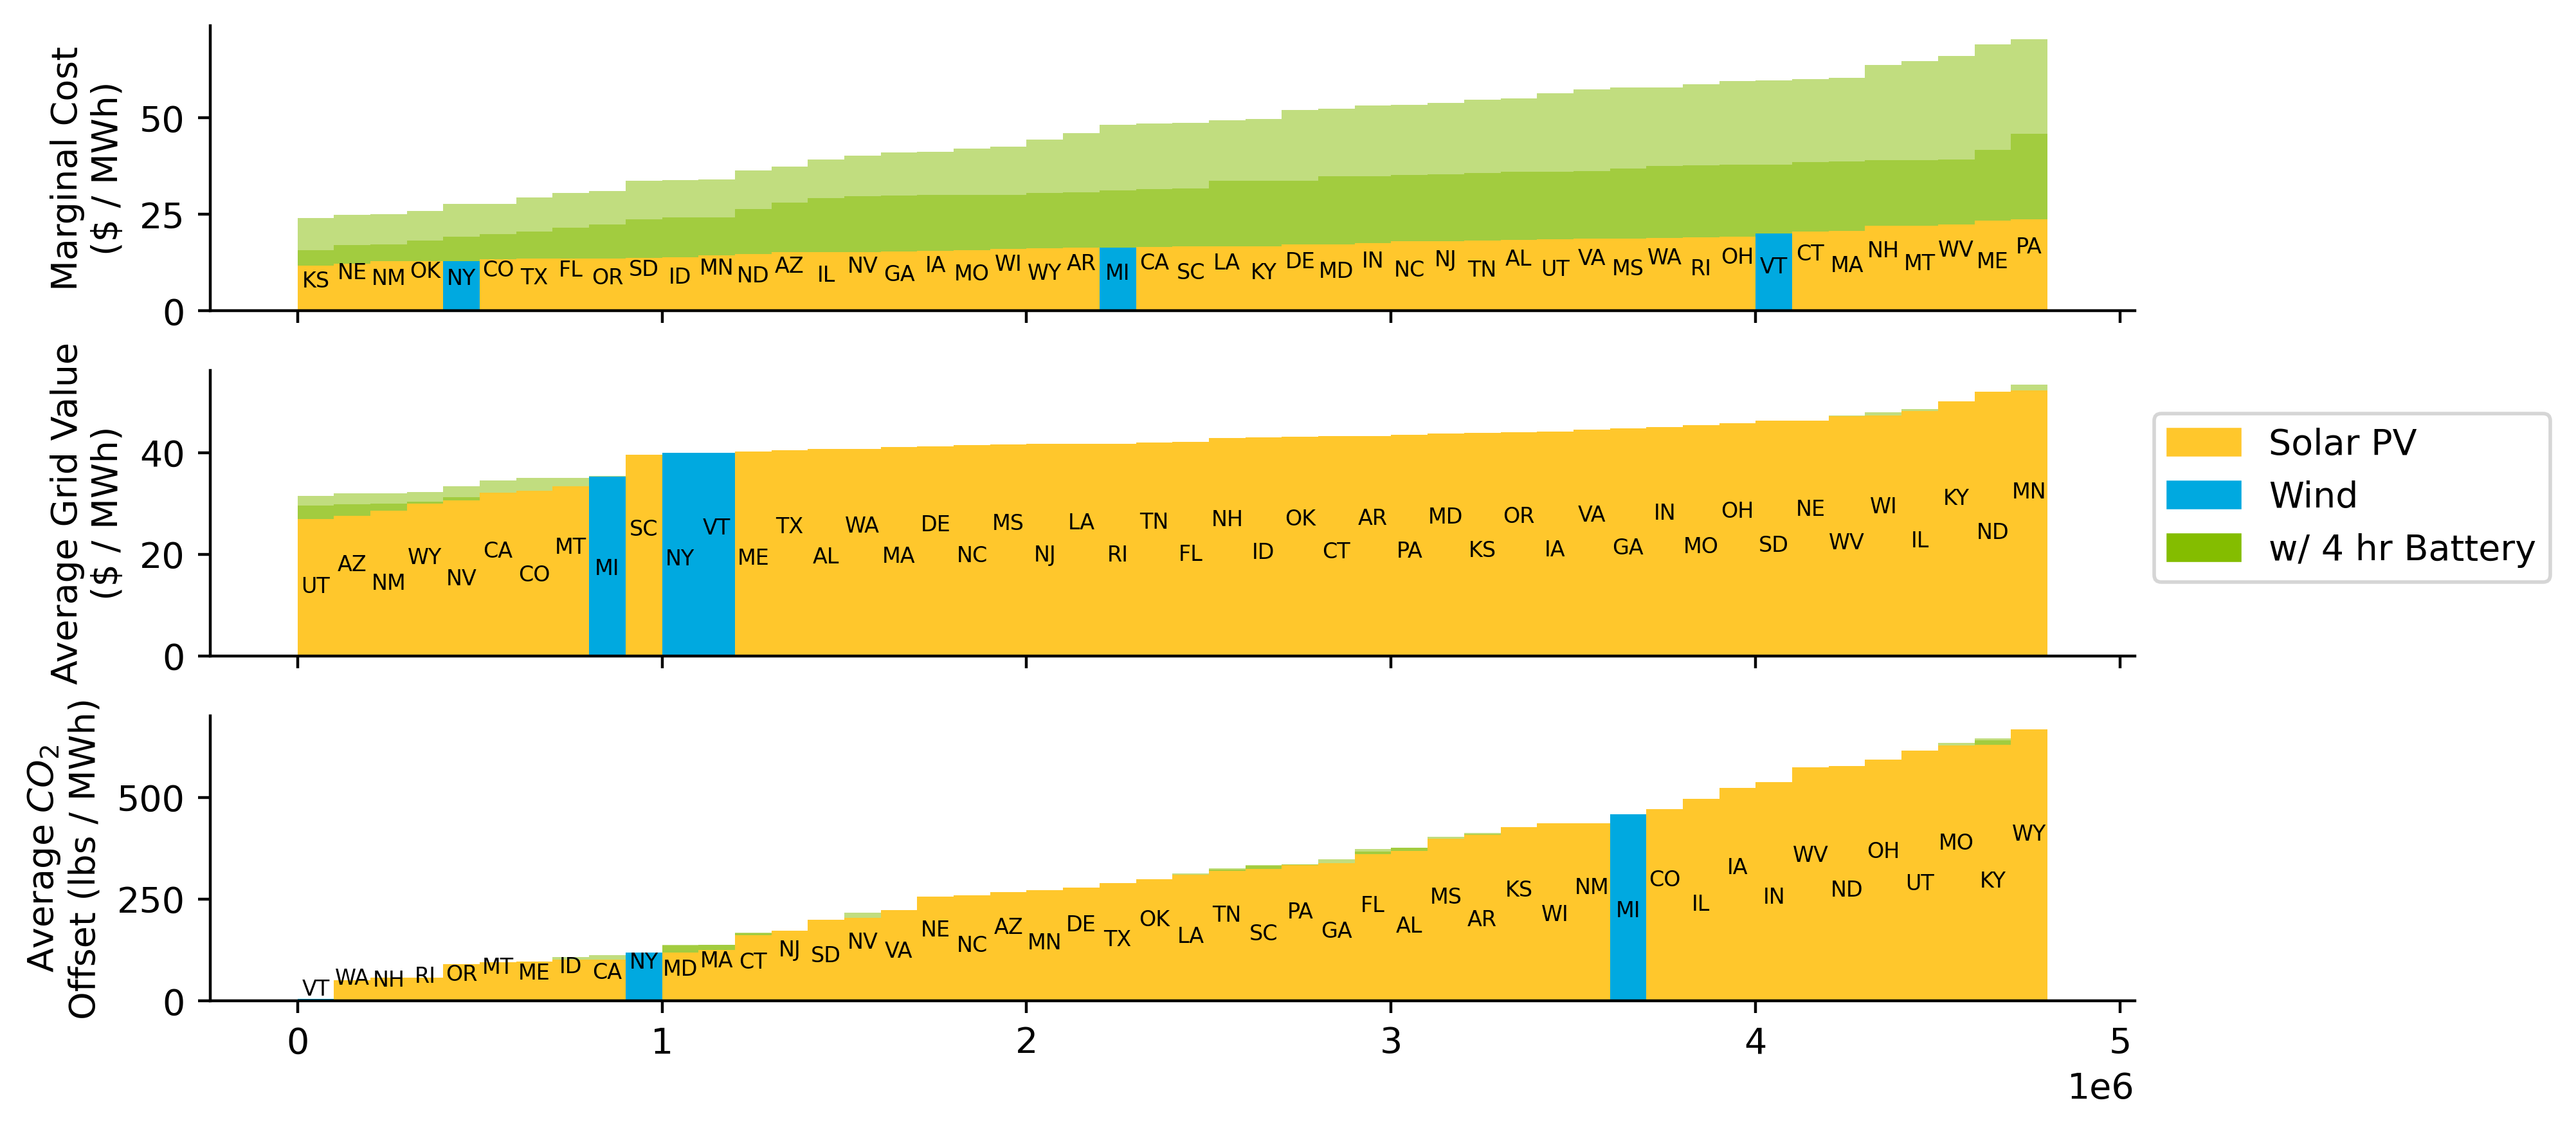

In [6]:
plot_df = Viz.gdf
opt_var = 'marginal_cost_mwh'
plot_vars = ['marginal_cost_mwh','grid_value_per_mwh','lifetime_cambium_co2_rate_avg_mwh']
ascending=True
batt_size=[25,100]

label_dict = {
    'marginal_cost_mwh':'Marginal Cost\n($ / MWh)',
    'grid_value_per_mwh':'Average Grid Value\n($ / MWh)',
    'lifetime_cambium_co2_rate_avg_mwh':'Average $CO_2$\nOffset (lbs / MWh)'
}

nrel_color_dict = ['#0077C8', #darkblue
                '#00A9E0', #lightblue
                '#658D1B', #darkgreen
                '#84BD00', #lightgreen
                '#FFC72C', #yellow
                '#DE7C00', #orange
                '#5B6770', #darkgray
                '#C1C6C8'] #lightgray

tech_dict = {'pv':nrel_color_dict[4],
            'wind':nrel_color_dict[1],
            'batt':nrel_color_dict[3]}


fig, axs = plt.subplots(nrows=3, figsize=(8.5,4.5), dpi=400, sharex=True)
    
for axi, plot_var in enumerate(plot_vars):
    # --- subset scenario ---
    no_batt = plot_df.loc[(plot_df['scenario'] == scenario) & (plot_df['batt_size'] == 0)]

    # --- drop duplicate techs for same state ---
    no_batt.sort_values(opt_var, ascending=ascending, inplace=True)
    no_batt.drop_duplicates(subset=['region', 'scenario'], inplace=True, keep='first')
    no_batt.sort_values(plot_var, ascending=ascending, inplace=True)

    # --- mock up widths and bar positions and color ---
    width = [i for i in no_batt['system_capacity']]

    relative_positions = []
    relative_position = 0
    previous_width = 0
    for w in width:
        relative_position = float(relative_position + (previous_width/2) + (w/2))
        previous_width = w
        relative_positions.append(relative_position)

    colors = no_batt['tech'].map(tech_dict)

    axs[axi].bar(relative_positions, no_batt[plot_var],
                width=width, linewidth=0.0,
                color=colors)

    # --- mock up label positions ---
    odd = -1
    for i, l in enumerate(no_batt['region']):
        x = relative_positions[i]
        y_max = list(no_batt[plot_var])[i]
        y =  y_max / 2 + (odd * y_max * 0.075)
        axs[axi].annotate(l, xy=(x,y), ha='center',va='bottom',
                            fontsize=6)
        odd *= -1

    # --- plot battery bars ---
    if batt_sizes != None:
        for batt_size in batt_sizes:
            batt = plot_df.loc[(plot_df['scenario'] == scenario) & (plot_df['batt_size'] == batt_size)]
            batt.sort_values(opt_var, ascending=ascending, inplace=True)
            batt.drop_duplicates(subset=['region', 'scenario'], inplace=True, keep='first')
            batt.sort_values(plot_var, ascending=ascending, inplace=True)

            axs[axi].bar(relative_positions, batt[plot_var],
                    width=width, linewidth=0.0,
                    color=nrel_color_dict[3], alpha=0.5, zorder=0)

    # --- clean up ---
#     plt.title(f'{scen_label_dict[scenario]}', fontsize=10)
    plt.subplots_adjust(hspace=0.5)
    axs[axi].set_ylabel(label_dict[plot_var])
    plt.xlabel('')#Cumulative RE Capacity')
    # plt.ylim(-5, 70)
    plt.tight_layout()

label_dict = {'pv':'Solar PV', 'wind':'Wind', 'batt':'w/ 4 hr Battery'}
custom_patches = [mpatches.Patch(color=v, label=label_dict[k]) for k,v in tech_dict.items()]
axs[1].legend(handles=custom_patches, bbox_to_anchor=(1.01, 0.85), loc=2, borderaxespad=0.)

sns.despine(fig)

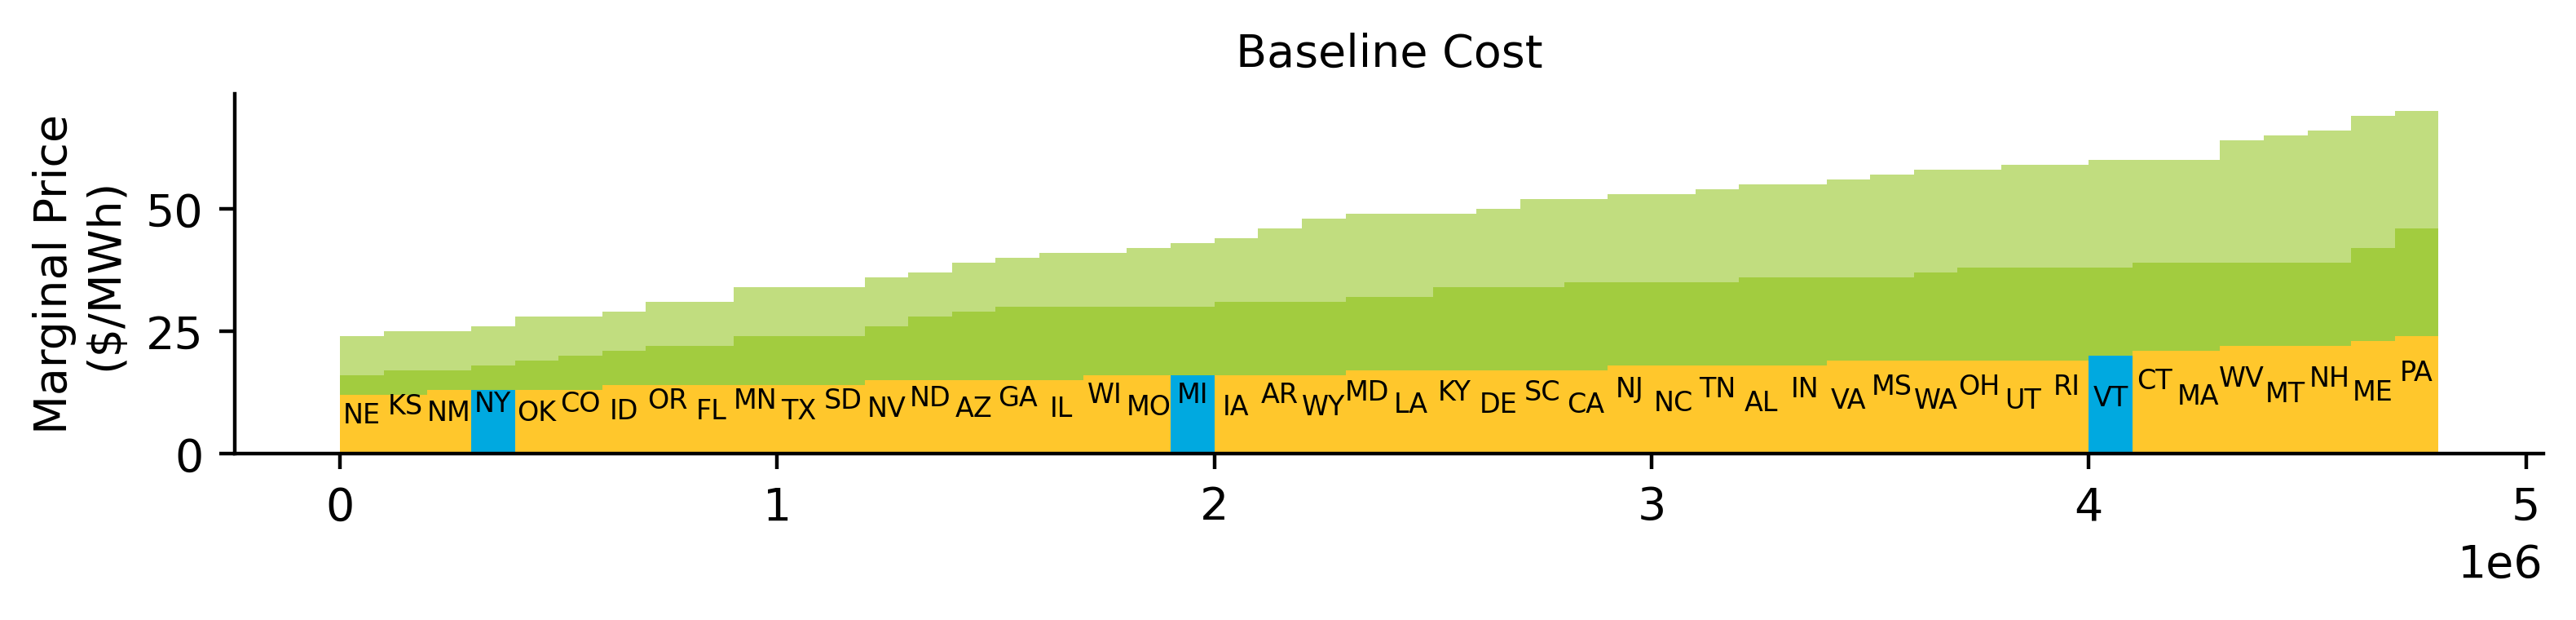

In [7]:
opt_var = 'marginal_cost_mwh'
label = 'Marginal Cost\n($ / MWh)'
Viz.supply_curve(opt_var, 'StdScen19_Mid_Case', batt_sizes=[25, 100], legend=False)

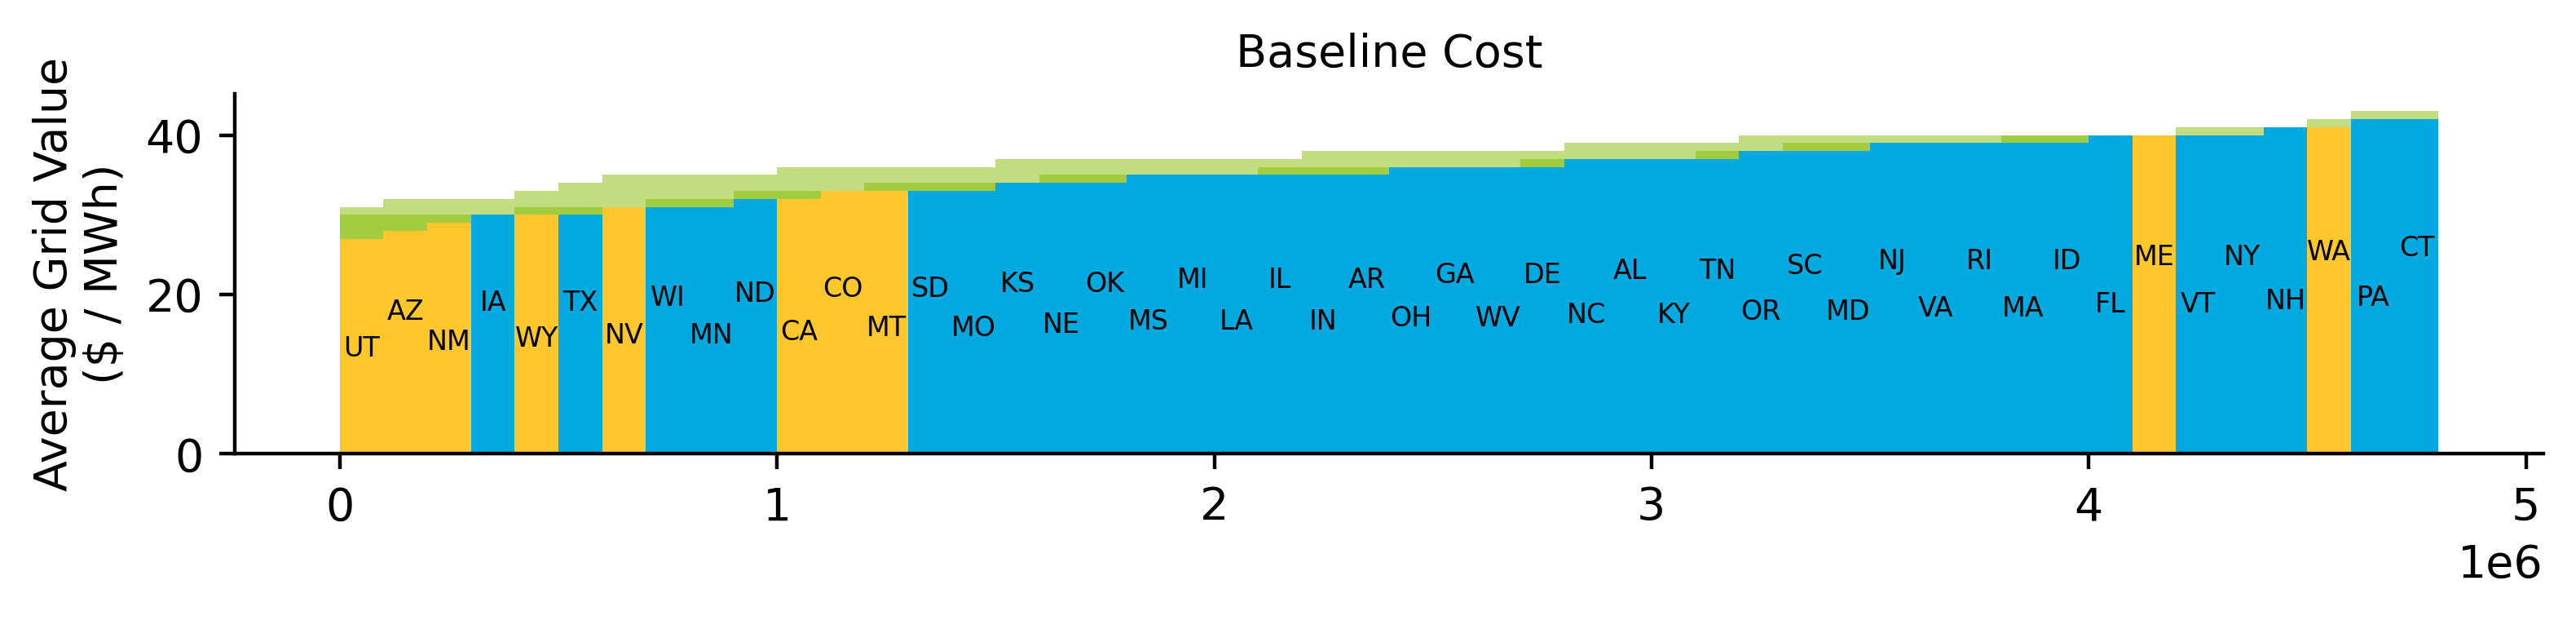

In [8]:
opt_var = 'grid_value_per_mwh'
label = 'Average Grid Value\n($ / MWh)'
Viz.supply_curve(opt_var, 'StdScen19_Mid_Case', batt_sizes=[25, 100], legend=False, label=label)

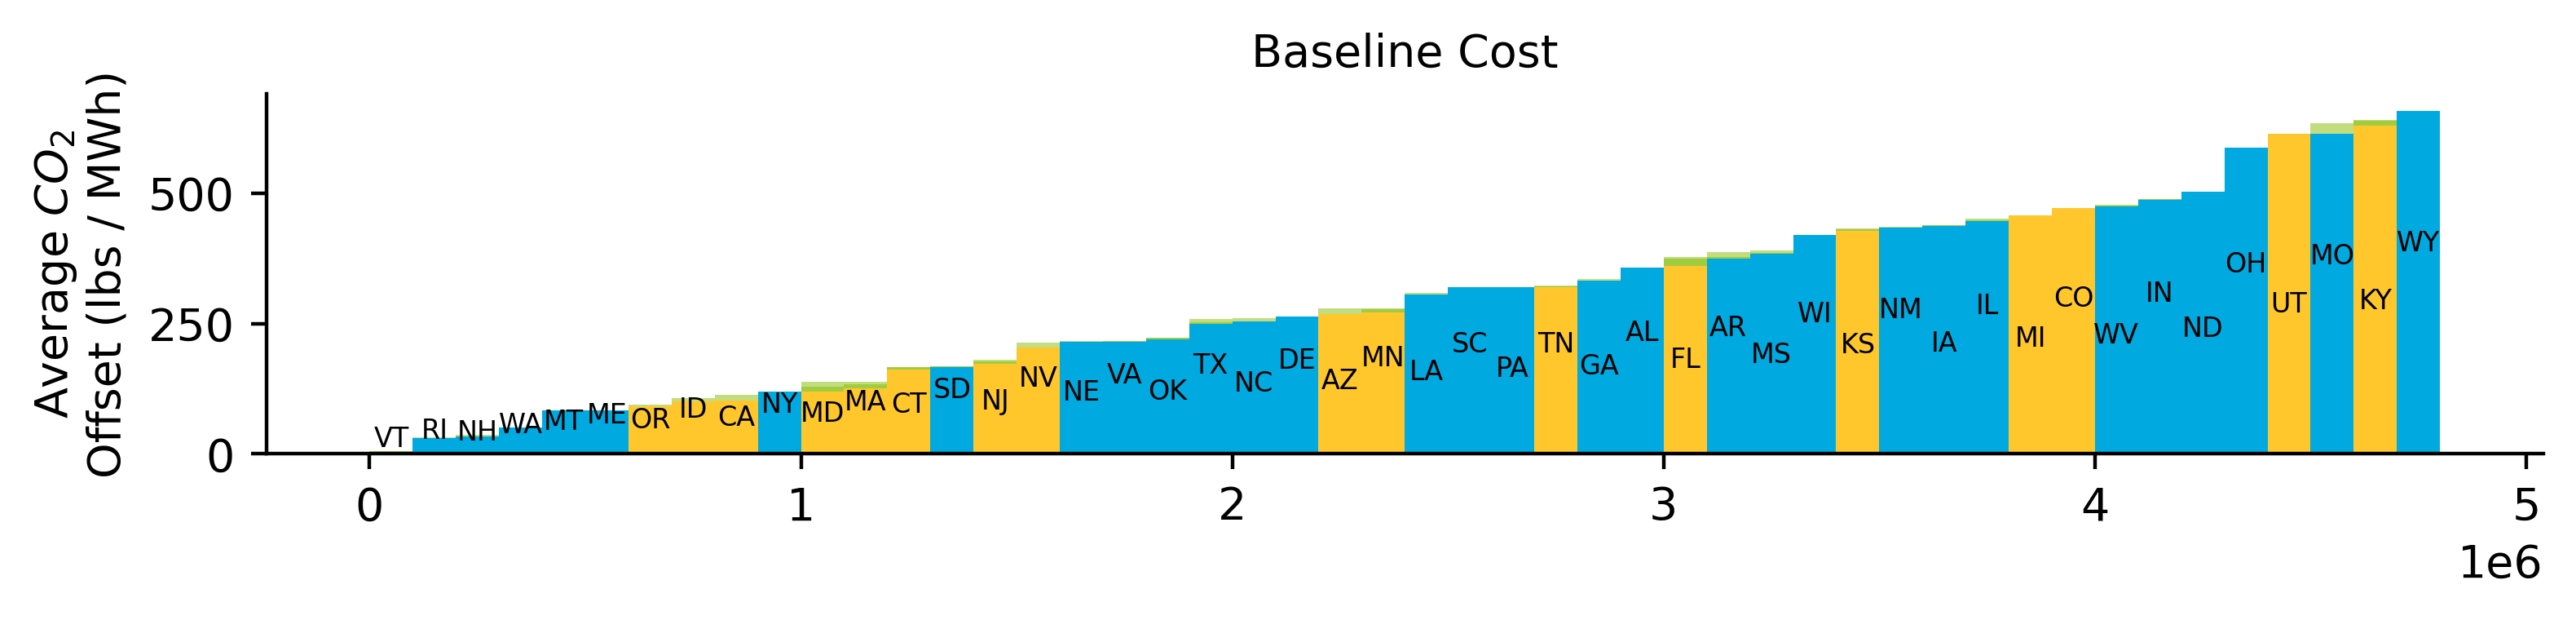

In [9]:
opt_var = 'lifetime_cambium_co2_rate_avg_mwh'
label = 'Average $CO_2$\nOffset (lbs / MWh)'
Viz.supply_curve(opt_var, 'StdScen19_Mid_Case', batt_sizes=[25, 100], legend=False, label=label)

In [10]:
grouped = results.groupby(['scenario','tech','batt_size'], as_index=False)\
                [['marginal_cost_mwh','grid_value_per_mwh','lifetime_cambium_co2_rate_avg_mwh','lifetime_output_mwh']].mean()
# grouped[['lifetime_cambium_co2_rate_avg','lifetime_cambium_grid_value']] /= 1e6

rename_dict = {'StdScen19_High_RE_Cost':'High Cost', 'StdScen19_Mid_Case':'Mid Cost', 'StdScen19_Low_RE_Cost':'Low Cost'}
grouped['scenario'] = grouped['scenario'].map(rename_dict)
grouped['scenario'] = pd.Categorical(grouped['scenario'], categories=['Low Cost', 'Mid Cost', 'High Cost'], ordered=True)

tech_dict = {'pv':'PV', 'wind':'Wind'}
grouped['tech'] = grouped['tech'].map(tech_dict)

grouped.sort_values(['scenario','tech','batt_size'], inplace=True)
grouped.columns = ['Scenario','Tech','Batt Size (MW)', 'Marginal Cost ($/MWh)', 'Grid Value ($ / MWh)', 'Avoided CO2 (lbs / MWh)','gen']
grouped.to_csv(os.path.join('images','supply_curve_table.csv'))
grouped


,Scenario,Tech,Batt Size (MW),Marginal Cost ($/MWh),Grid Value ($ / MWh),Avoided CO2 (lbs / MWh),gen
6,Low Cost,PV,0.0,19.843877,31.400742,273.405604,2.537215e+06
7,Low Cost,PV,25.0,38.970007,34.711012,279.496627,2.491041e+06
8,Low Cost,PV,100.0,66.383790,35.938536,284.663397,2.441907e+06
9,Low Cost,Wind,0.0,40.011178,36.337881,287.445717,2.809004e+06
10,Low Cost,Wind,25.0,45.169089,35.934068,285.708419,2.855799e+06
11,Low Cost,Wind,100.0,58.122738,36.403463,285.963024,2.985946e+06
12,Mid Cost,PV,0.0,17.217527,41.807698,315.937631,2.534447e+06
13,Mid Cost,PV,25.0,36.520823,44.337220,319.073817,2.490819e+06
14,Mid Cost,PV,100.0,64.543711,43.842076,319.426271,2.443187e+06
15,Mid Cost,Wind,0.0,39.802751,37.623720,304.917630,2.804903e+06


In [11]:
set(pd.read_pickle('results/state_best_pv_StdScen19_High_RE_Cost_marginal_cost_mwh_batt_100.0_4.0.pkl'))

{'6par_Adj',
 '6par_Il',
 '6par_Io',
 '6par_Rs',
 '6par_Rsh',
 '6par_a',
 'ac_loss',
 'adjusted_installed_cost',
 'analysis_period_irr',
 'annual_ac_battery_loss_percent',
 'annual_ac_gross',
 'annual_ac_inv_clip_loss_percent',
 'annual_ac_inv_eff_loss_percent',
 'annual_ac_inv_pnt_loss_percent',
 'annual_ac_inv_pso_loss_percent',
 'annual_ac_inv_tdc_loss_percent',
 'annual_ac_lifetime_loss_percent',
 'annual_ac_loss_ond',
 'annual_ac_perf_adj_loss_percent',
 'annual_ac_wiring_loss',
 'annual_ac_wiring_loss_percent',
 'annual_dc_battery_loss_percent',
 'annual_dc_diodes_loss',
 'annual_dc_diodes_loss_percent',
 'annual_dc_gross',
 'annual_dc_invmppt_loss',
 'annual_dc_lifetime_loss_percent',
 'annual_dc_loss_ond',
 'annual_dc_mismatch_loss',
 'annual_dc_mismatch_loss_percent',
 'annual_dc_module_loss_percent',
 'annual_dc_mppt_clip_loss_percent',
 'annual_dc_nameplate_loss',
 'annual_dc_nameplate_loss_percent',
 'annual_dc_net',
 'annual_dc_nominal',
 'annual_dc_optimizer_loss',
 'annu

In [12]:
# spaghetti plot of existing 'lifetime_cambium_total_value' through 2050
# spaghetti plot of existing co2 through 2050 